## Julia Version of Chapter 1 G-H-Filter

The G-H Filter is a way of balancing:

1. My belief on my understanding of the system dynamics (predicton).
2. My belief on my sensors (measurements).

This is applied to my system state ($x$) and to the rate of change
of my system state ($\dot{x}$).

Both $g$ (mostly influencing $x$) and $h$ (mostly influencing $\dot{x}$) represent my bias in belief towards my prediction or my measurements.

* The Higher the value of $g$ $\rightarrow$ the more I believe my Measurements of $x$.
* The Higher the value of $h$ $\rightarrow$ the more I believe my Measurements of $\dot{x}$.
* If the values are low, it means I trust more my Predictions.

Basically the Algorithm of the Filter is:

1. Start with an initial state: $\mathbf{\hat{x}}_0 = [\hat{x}_0, \dot{\hat{x}}_0]^T$
2. Predict the $x$ for the next step: $\hat{x}_{k+1} = \hat{x}_k + \dot{\hat{x}}_k \Delta t$
3. Estimate $x$ (balance between my measurement and prediction): $x_{k+1} = \hat{x}_{k+1} + g(z_{k+1} - \hat{x}_{k+1})$
4. Predict $\dot{x}$ for the next step: $\dot{\hat{x}}_{k+1} = \dot{\hat{x}}_{k} + h (\frac{z_k - \dot{\hat{x}}_k}{\Delta t})$


In [ ]:
#Initial G-H Filter, as per original

weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
actual_weight(t) = t + 160

function GH_Filter_Initial(x0, dx0, dt, g, measurements)
    estimates = Float64[x0]
    predictions = Float64[]

    for z in measurements
        x_hat = x0 + dx0*dt
        push!(predictions, x_hat)
        x = x_hat + g*(z - x_hat)
        push!(estimates, x)
        x0 = x
    end
    return estimates, predictions
end

using Plots

#Run the Filter
estimates, predictions = GH_Filter_Initial(160., 1., 1, 0.4, weights)

#Plot the Measurements, Predictions, and Estimates
n = 1:length(weights)  # time steps for predictions
t = 0:length(weights)    # time steps for estimates (1 more point)
plot(t, estimates, label="Estimates", linewidth=2, marker=:circle)
plot!(n, predictions, label="Predictions", linestyle=:dash, marker=:diamond)
plot!(1:length(weights), weights, label="Measurements", linestyle=:dot, marker=:star, legend=:topleft, grid=true)
plot!(t, actual_weight.(t), label="Actual", linewidth=1, linecolor=:black)
xlabel!("Time step")
ylabel!("Weight")
title!("G-H Filter")




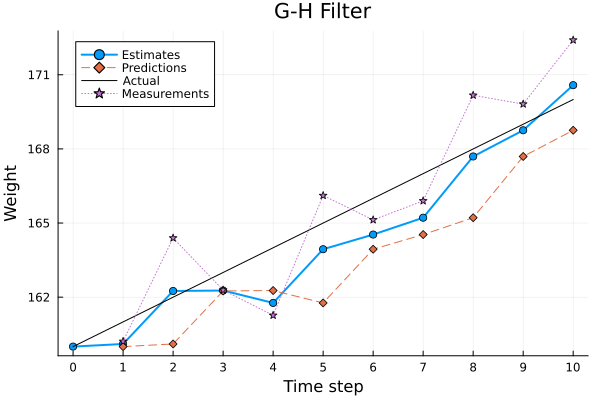

In [ ]:
#General G-H Filter (fixed time steps)

function Gen_Noisy_Data(x0, dx, dt, steps, noise_factor)
    real_data = Float64[x0]
    for i in 1:steps
        x = x0 + dx*dt*i
       push!(real_data, x)
    end
    noisy_data = real_data[2:end] .+ randn(steps)*noise_factor
    return noisy_data, real_data
end

function GH_Filter(noisy_data, x0, dx0, dt, g, h)
    x_est = x0
    dx = dx0
    estimates = Float64[x_est]
    predictions = Float64[]
    for z in noisy_data
        #Prediction step
        x_pred = x_est + (dx*dt)
        push!(predictions, x_pred)
        dx = dx
        #Update Step
        residual = z - x_pred
        x_est = x_pred + g*residual
        push!(estimates, x_est)
        dx = dx + h*(residual/dt)
    end
    return estimates, predictions
end

using Plots

#Run the Filter
noisy_data, data = Gen_Noisy_Data(160, 1., 1, 10, 1.5)
estimates, predictions = GH_Filter(noisy_data, 160., 0., 1, 0.5, 0.)

#Plot the Measurements, Predictions, and Estimates
p = 1:length(predictions)  # time steps for predictions
n = 0:length(estimates)-1 # time steps for estimates
plot(n, estimates, label="Estimates", linewidth=2, marker=:circle, xticks = 0:1:15)
plot!(p, predictions, label="Predictions", linestyle=:dash, marker=:diamond)
plot!(n, data, label="Actual", linewidth=1, linecolor=:black)
plot!(p, noisy_data, label="Measurements", linestyle=:dot, marker=:star, legend=:topleft, grid=true)
xlabel!("Time step")
ylabel!("Weight")
title!("G-H Filter")